# Información 

1. Descricpción del problema
1. Data cleaning 
1. Data formatting
1. EDA
3. Feature selecction y engenieering
4. Comparación de modelos
5. Hyperparameter tunning sobre el mejor modelo
6. Evaluacion
7. Interpretación
8. Conclusión

OBJETIVO: Determinar que cuotas no van a ser pagas en termino el mes siguiente

# 0. IMPORTACIONES Y SETEOS

## Imports 

In [1]:
# Pandas y numpy para manipulación de datos
import pandas as pd
import numpy as np
# Librerias para gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
# Funciones de DS
import DSImplementation as dsimp
# Funciones para analizar valores faltantes 
import missingno as msno
# para limpiar outliers
from scipy import stats


In [2]:
from sklearn.model_selection import train_test_split

## Seteos

In [3]:
# Para evitar que salgan advertencias por usar dataframes sin un .copy()
pd.options.mode.chained_assignment = None

# Se setea un maximo de 60 columnas para visualizar
pd.set_option('display.max_columns', 60)

# Matplotlib visualización en la celda
%matplotlib inline

# Ver con dos decimales los float en los data frames
pd.options.display.float_format = "{:,.2f}".format


# 1. DESCRIPCIÓN DEL PROBLEMA 

Se requiere de un modelo capaz de predecir cuales son las cuotas que el mes que viene tienen una alta probabilidad de no ser pagas conforme la informacion actual

* Fecha_Pago: fecha cuando la persona pago la cuota del prestamo. Es diferente a la fecha de acreditación. 
* Vencimiento: fecha en la cual vence el prestamos, y hay algunos prestamos con doble fecha de vencimiento. El primer vencimiento es siempre el 20 y el segundo es el 30. No todos los tipos de linea de prestamos admiten segundo vencimiento. 
* Tipo de prestamo: numero de ID, cada ID corresponde a un barrio diferente. El IVC construye de a un barrio por vez. Puede pasar que para un mismo barrio puedo tener diferentes tipo de prestamo (linea de prestamo). 
* Numero_Prestamo: Es el ID del prestamo. Es unico y no se repite
* DNI
* Total_prestamo[CALCULADO]: el total que tiene que pagar para el prestamos, no es lo que le falta. Se calcula como suma de capital, interes y gastos.
* Total_cutas: cantidad de cuotas que tiene el prestamo
* Numero de cuota: es la cuota que se esta pagando. Se permite saltear cuotas, es decir, se puede no pagar la 16 y pagar la 17. De esta forma la persona quedaria adeudnado la cuota 16.
* Porcentage de cuota sobre prestamo: cuota/prestamo
* Pago: monto del recibo de pago. Cada pago puede no corresponder a una unica cuota. Puede ser una de cuatro opciones: Pago de cuota completa, pago parcial de cuota, adelanto de cuota, pago completo del prestamo. 
* Genero: Masculino o Femenino, binario
* Edad[CALCULADO]: la edad del que pide el prestamo
* Paga_en_termino [CALCULADO]: si pago antes del vencimiento. A partir de 2021 se introdujo segundo vencimiento (el 30). 1 es que esta en termino, 0 que no pago en termino
* Refinaciado [CALCULADO] : indica si el prestamo fue refinanciado en el pasado. Es decir, cuando se reestructura la deuda. 1 es que esta refinanciado, 0 que no esta refinanciado. 


# 2. DATA CLEANING

## Carga del dataset a trabajar 

In [4]:
# Se carga el dataset
df = pd.read_csv('Data/DATASET TP4 VERSION 7 2015-2019 correjido.csv', sep=';')
df.head(5)

,Fecha_Pago,Vencimiento,Tipo_Prestamo,Numero_Prestamo,DNI,Total_Prestamo,Total_cuotas,Numero_Cuota,Porcentaje_de_cuotas_faltantes,Pago,Porcentaje_de_cuota_sobre_prestamo,genero,Edad,Paga_en_Termino,Refinanciado
0,02/01/2015,20/02/2015,974,1091205,"16,090,435.00","181874,40",240,119,"0,50","623,82","0,34",Masculino,42.00,1,0
1,02/01/2015,20/01/2015,974,1091205,"16,090,435.00","181874,40",240,118,"0,51","623,82","0,34",Masculino,42.00,1,0
2,02/01/2015,20/03/2015,974,1091205,"16,090,435.00","181874,40",240,120,"0,50","623,82","0,34",Masculino,42.00,1,0
3,02/01/2015,20/01/2015,955,1095467,"2,115,837.00","14180,19",360,102,"0,72","45,26","0,32",Femenino,95.00,1,0
4,02/01/2015,20/02/2015,877,10991758,"25,238,393.00","551452,31",360,45,"0,88","993,63","0,18",NaN,45.00,1,0


In [5]:
# Estandarizo los nombres de las columnas
columns_names_new = list(map(lambda x: x.lower(), df.columns))
df.columns = columns_names_new
df.head()

,fecha_pago,vencimiento,tipo_prestamo,numero_prestamo,dni,total_prestamo,total_cuotas,numero_cuota,porcentaje_de_cuotas_faltantes,pago,porcentaje_de_cuota_sobre_prestamo,genero,edad,paga_en_termino,refinanciado
0,02/01/2015,20/02/2015,974,1091205,"16,090,435.00","181874,40",240,119,"0,50","623,82","0,34",Masculino,42.00,1,0
1,02/01/2015,20/01/2015,974,1091205,"16,090,435.00","181874,40",240,118,"0,51","623,82","0,34",Masculino,42.00,1,0
2,02/01/2015,20/03/2015,974,1091205,"16,090,435.00","181874,40",240,120,"0,50","623,82","0,34",Masculino,42.00,1,0
3,02/01/2015,20/01/2015,955,1095467,"2,115,837.00","14180,19",360,102,"0,72","45,26","0,32",Femenino,95.00,1,0
4,02/01/2015,20/02/2015,877,10991758,"25,238,393.00","551452,31",360,45,"0,88","993,63","0,18",NaN,45.00,1,0


## Tipo de datos, valores faltantes y valores nulos 

In [6]:
# Cantidad de datos totales
rows_n, cols_n = df.shape
print(rows_n, cols_n)

763877 15


### Valores nulos y tipo de datos 

In [7]:
# Se observa los tipos de columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763877 entries, 0 to 763876
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   fecha_pago                          763877 non-null  object 
 1   vencimiento                         763877 non-null  object 
 2   tipo_prestamo                       763877 non-null  int64  
 3   numero_prestamo                     763877 non-null  int64  
 4   dni                                 649441 non-null  float64
 5   total_prestamo                      763877 non-null  object 
 6   total_cuotas                        763877 non-null  int64  
 7   numero_cuota                        763877 non-null  int64  
 8   porcentaje_de_cuotas_faltantes      763877 non-null  object 
 9   pago                                763877 non-null  object 
 10  porcentaje_de_cuota_sobre_prestamo  763877 non-null  object 
 11  genero                    

In [8]:
# Detectamos valores faltantes en el dataset
dsimp.missing_values_table(df)

Your selected dataframe has 15 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
genero,326688,42.80
edad,299550,39.20
dni,114436,15.00


Detectamos Valores faltantes en GENERO; EDAD Y DNI

<AxesSubplot:>

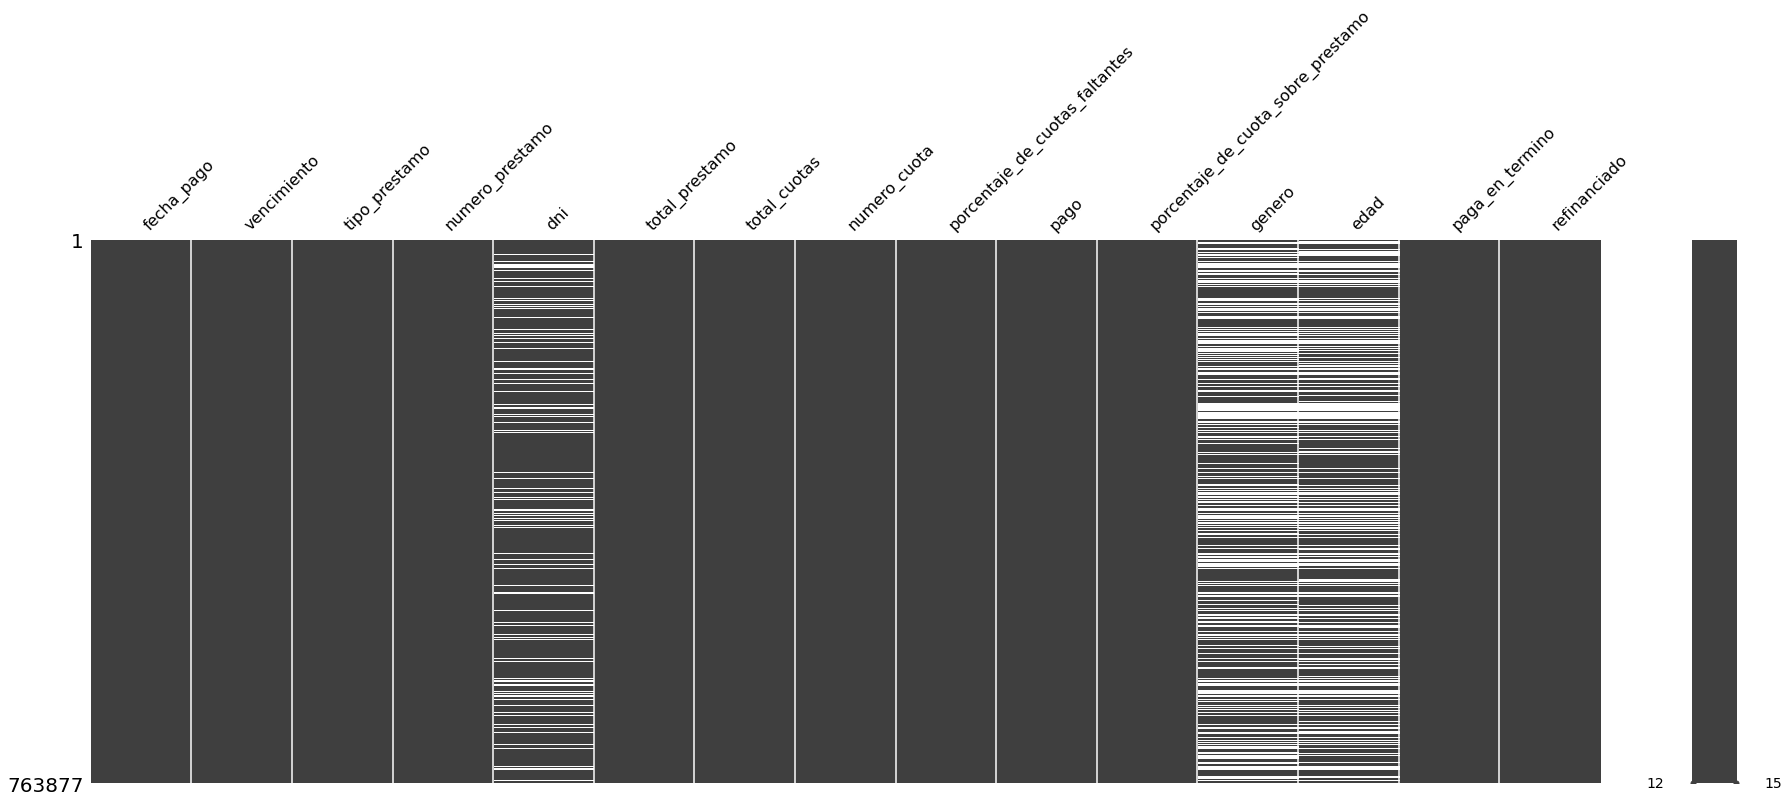

In [9]:
# Detectamos valores faltantes de forma grafica
msno.matrix(df, figsize=(30,10))

### Chequeo que para cada DNI exista una unica edad y genero

In [10]:
# Separo los nombres de columnas que voy a usar, asociados a la info del DNI
dni_df = df[['dni', 'edad', 'genero']]

In [11]:
# Obtengo un data frame con la cantidad de entradas unicas de genero y edad por DNI
dni_uniques = dni_df.groupby('dni')['edad','genero'].nunique()
dni_uniques.head(3)

C:\Users\Fran\AppData\Local\Temp/ipykernel_11152/1734071313.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dni_uniques = dni_df.groupby('dni')['edad','genero'].nunique()


,edad,genero
dni,,
2.00,0,0
9.00,1,1
29.00,1,1


In [12]:
# Obtengo los DNI que tengan mas de una edad o genero
dni_error = dni_uniques[(dni_uniques>1).any(axis=1)].index
dni_error

Float64Index([ 3073270.0,  4305479.0,  4954272.0,  4991124.0,  5087952.0,
               5124029.0,  5138405.0,  5201050.0,  5282162.0,  5570811.0,
               5594257.0,  5658001.0,  5665791.0,  6084686.0,  6147893.0,
               6245394.0,  6371629.0,  6519814.0,  6536437.0,  6652650.0,
               7162249.0,  7377515.0,  7704965.0,  8252165.0,  8326485.0,
               8400924.0,  8514256.0,  8633243.0, 10174146.0, 10758672.0,
              11241030.0, 11469042.0, 11768623.0, 12702446.0, 12712566.0,
              13285676.0, 14317845.0, 16051677.0, 16315055.0, 16938614.0,
              17046748.0, 17187923.0, 17283305.0, 17563244.0, 17614252.0,
              18328611.0, 18387076.0, 18404973.0, 18652869.0, 20351439.0,
              20389809.0, 20986191.0, 21640157.0, 24905162.0, 25228398.0,
              92028416.0, 92089425.0, 92099674.0, 92244256.0, 92452663.0,
              92640824.0, 92676137.0, 92840561.0, 92903683.0, 92940304.0,
              92947290.0, 92950018.0, 

In [13]:
# Creo un data frame sin los DNIs que tengan porblemas por doble de dato de genero y edad
df_1_sin_dni_error = df[~df['dni'].isin(dni_error)].copy()

### Genero y edad 

In [14]:
# Separo las columnas de genero y edad del resto
columns_problem = ['genero', 'edad']
columns_ok = list(set(df.columns) - set(columns_problem))

In [15]:
#  Chequeo filas duplicadas del dataset, habiendo sacado las columnas de genero y edad.
df_1_sin_dni_error[columns_ok].duplicated().sum()

65590

In [16]:
# Mergeo las filas duplicadas remplazando los valores nulos de genero y edad
df_2_sin_dup =df_1_sin_dni_error.groupby(columns_ok)[columns_problem].first().reset_index()

In [17]:
# chequeo valores faltantes
dsimp.missing_values_table(df_2_sin_dup)

Your selected dataframe has 15 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
genero,142829,24.80
edad,121511,21.10


In [18]:
# ya no tengo filas duplicadas
df_2_sin_dup[columns_ok].duplicated().sum()

0

In [19]:
# separo los dni que tienen valores nulos
dni_gen_null = df_2_sin_dup.loc[df_2_sin_dup['genero'].isnull(), 'dni']
dni_edad_null = df_2_sin_dup.loc[df_2_sin_dup['edad'].isnull(), 'dni']

### Busco completar el genero que sigue en NAN

In [20]:
# trato de ver si puedo traer el genero del dni
df.loc[(df['dni'].isin(dni_gen_null)) & (~df['genero'].isnull())]

,fecha_pago,vencimiento,tipo_prestamo,numero_prestamo,dni,total_prestamo,total_cuotas,numero_cuota,porcentaje_de_cuotas_faltantes,pago,porcentaje_de_cuota_sobre_prestamo,genero,edad,paga_en_termino,refinanciado


### Busco completar la edad que sigue en NAN

In [21]:
# trato de ver si puedo traer la edad del los dni faltantes buscandolos en el dataset  original
df.loc[(df['dni'].isin(dni_edad_null)) & (~df['edad'].isnull())]

,fecha_pago,vencimiento,tipo_prestamo,numero_prestamo,dni,total_prestamo,total_cuotas,numero_cuota,porcentaje_de_cuotas_faltantes,pago,porcentaje_de_cuota_sobre_prestamo,genero,edad,paga_en_termino,refinanciado


In [22]:
# No puedo completar las filas asi que las saco
df_3_sin_nan = df_2_sin_dup.dropna()

In [23]:
# chequeo valores faltantes
dsimp.missing_values_table(df_3_sin_nan)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# 3. DATA FORMATING

In [24]:
# Creo una copia del Data Frame para trabarlo mejor
df_4_parsed = df_3_sin_nan.copy()

In [25]:
# Observo el tipo de dato e informacion para coda columna del dataset
df_4_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395516 entries, 1 to 575915
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   porcentaje_de_cuota_sobre_prestamo  395516 non-null  object 
 1   pago                                395516 non-null  object 
 2   vencimiento                         395516 non-null  object 
 3   dni                                 395516 non-null  float64
 4   numero_cuota                        395516 non-null  int64  
 5   numero_prestamo                     395516 non-null  int64  
 6   tipo_prestamo                       395516 non-null  int64  
 7   paga_en_termino                     395516 non-null  int64  
 8   porcentaje_de_cuotas_faltantes      395516 non-null  object 
 9   fecha_pago                          395516 non-null  object 
 10  total_cuotas                        395516 non-null  int64  
 11  total_prestamo            

 ### Análisis de los tipo de de columna

In [26]:
# Columnas que son de tipo objeto
df_4_parsed.select_dtypes(include="object").columns

Index(['porcentaje_de_cuota_sobre_prestamo', 'pago', 'vencimiento',
       'porcentaje_de_cuotas_faltantes', 'fecha_pago', 'total_prestamo',
       'genero'],
      dtype='object')

In [27]:
# Columnas que son de tipo float
df_4_parsed.select_dtypes(include="float").columns

Index(['dni', 'edad'], dtype='object')

In [28]:
# Columnas que son de tipo int
df_4_parsed.select_dtypes(include="int").columns

Index([], dtype='object')

### Parseo de columnas str a float

In [29]:
# Parceo a tipo float las columnas
columns_to_float = ['pago', 'total_prestamo', 'porcentaje_de_cuotas_faltantes',  'porcentaje_de_cuota_sobre_prestamo']
for column in columns_to_float:
    df_4_parsed[column] = df_3_sin_nan[column].str.replace(',','.').astype('float')

In [30]:
# Observo los resultados
df_4_parsed[columns_to_float].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395516 entries, 1 to 575915
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   pago                                395516 non-null  float64
 1   total_prestamo                      395516 non-null  float64
 2   porcentaje_de_cuotas_faltantes      395516 non-null  float64
 3   porcentaje_de_cuota_sobre_prestamo  395516 non-null  float64
dtypes: float64(4)
memory usage: 15.1 MB


### Parseo de columnas str a date

In [31]:
# Se convierten las columnas de tipo object a tipo date 
columns_to_dates = ['fecha_pago', 'vencimiento']
df_4_parsed[columns_to_dates] =df_4_parsed[columns_to_dates].astype('datetime64[ns]')

### Parseo de columnas str a category

In [32]:
# Parseo las columnas de genero a 0 y 1, para trabarlas mas adelante mejor
df_4_parsed['genero'] = df_4_parsed['genero'].str.lower().replace(['femenino','masculino'],[0,1])

### Formato final

In [33]:
# Chequeo que el formato sea el correcto
df_4_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395516 entries, 1 to 575915
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   porcentaje_de_cuota_sobre_prestamo  395516 non-null  float64       
 1   pago                                395516 non-null  float64       
 2   vencimiento                         395516 non-null  datetime64[ns]
 3   dni                                 395516 non-null  float64       
 4   numero_cuota                        395516 non-null  int64         
 5   numero_prestamo                     395516 non-null  int64         
 6   tipo_prestamo                       395516 non-null  int64         
 7   paga_en_termino                     395516 non-null  int64         
 8   porcentaje_de_cuotas_faltantes      395516 non-null  float64       
 9   fecha_pago                          395516 non-null  datetime64[ns]
 10  total_cu

In [34]:
# Separaro los meses y años de cada cuota en base a la fecha de pago
df_4_parsed['mes'] = df_4_parsed['fecha_pago'].dt.month 
df_4_parsed['anio'] = df_4_parsed['fecha_pago'].dt.year 

# 4. EDA

## Analisis variable objetivo

Primero se inicia analizando la variable target para analizar si se encuentra balanceado el data set. Observamos que sigue una distribución uniforme, con lo cual no vamos a necesitar recurrir a SMOTE para balancearlo. Concluimos que:

* El dataset se encuentra balanceado

In [35]:
df_4_parsed['paga_en_termino'].value_counts().apply(lambda x: x/df_4_parsed['paga_en_termino'].shape[0])

1   0.57
0   0.43
Name: paga_en_termino, dtype: float64

Text(0.5, 1.0, 'Balance de la variable objetivo "Paga_en_Termino"')

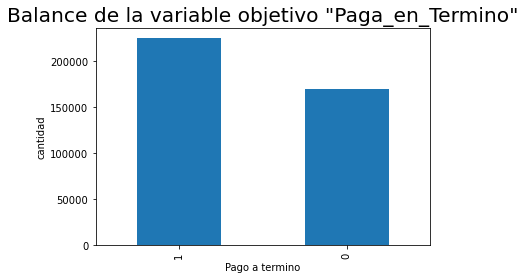

In [36]:
# Grafico
df_4_parsed['paga_en_termino'].value_counts().plot(kind='bar')
# Seteos del gráfico
plt.style.use('fivethirtyeight')
plt.xlabel('Pago a termino')
plt.ylabel ('cantidad')
plt.title('Balance de la variable objetivo "Paga_en_Termino"')

## Análisis de variables  

In [39]:
# Selecciono las columnas que me aportan datos
columns_data = ['total_cuotas', 'fecha_pago', 'numero_cuota', 'refinanciado', 'tipo_prestamo', 'pago', 'vencimiento',
                'total_prestamo','porcentaje_de_cuota_sobre_prestamo', 'paga_en_termino', 'porcentaje_de_cuotas_faltantes',  
               'genero', 'edad']

In [40]:
# Observo la información general de los datos
df_4_parsed.describe(include='all')

,porcentaje_de_cuota_sobre_prestamo,pago,vencimiento,dni,numero_cuota,numero_prestamo,tipo_prestamo,paga_en_termino,porcentaje_de_cuotas_faltantes,fecha_pago,total_cuotas,total_prestamo,refinanciado,genero,edad,mes,anio
count,"395,516.00","395,516.00",395516,"395,516.00","395,516.00","395,516.00","395,516.00","395,516.00","395,516.00",395516,"395,516.00","395,516.00","395,516.00","395,516.00","395,516.00","395,516.00","395,516.00"
unique,nan,nan,920,nan,nan,nan,nan,nan,nan,1722,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,2018-11-20 00:00:00,nan,nan,nan,nan,nan,nan,2018-01-22 00:00:00,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6413,nan,nan,nan,nan,nan,nan,2062,nan,nan,nan,nan,nan,nan,nan
first,nan,nan,1997-09-22 00:00:00,nan,nan,nan,nan,nan,nan,2015-01-02 00:00:00,nan,nan,nan,nan,nan,nan,nan
last,nan,nan,2025-11-20 00:00:00,nan,nan,nan,nan,nan,nan,2019-12-31 00:00:00,nan,nan,nan,nan,nan,nan,nan
mean,0.75,"5,613.99",NaN,"28,548,291.04",76.52,"7,231,047.59",738.07,0.57,0.69,NaN,277.12,"207,312.16",0.02,0.54,54.06,6.57,"2,017.14"
std,4.73,"122,692.01",NaN,"27,983,733.44",55.64,"4,739,496.28",334.21,0.50,0.22,NaN,115.46,"439,371.30",0.14,0.50,15.49,3.42,1.40
min,0.00,1.01,NaN,9.00,1.00,"107,059.00",1.00,0.00,0.00,NaN,1.00,94.74,0.00,0.00,3.00,1.00,"2,015.00"
25%,0.23,58.04,NaN,"12,131,738.00",27.00,"1,093,507.00",480.00,0.00,0.59,NaN,188.00,"20,001.68",0.00,0.00,43.00,4.00,"2,016.00"


<Figure size 432x288 with 0 Axes>

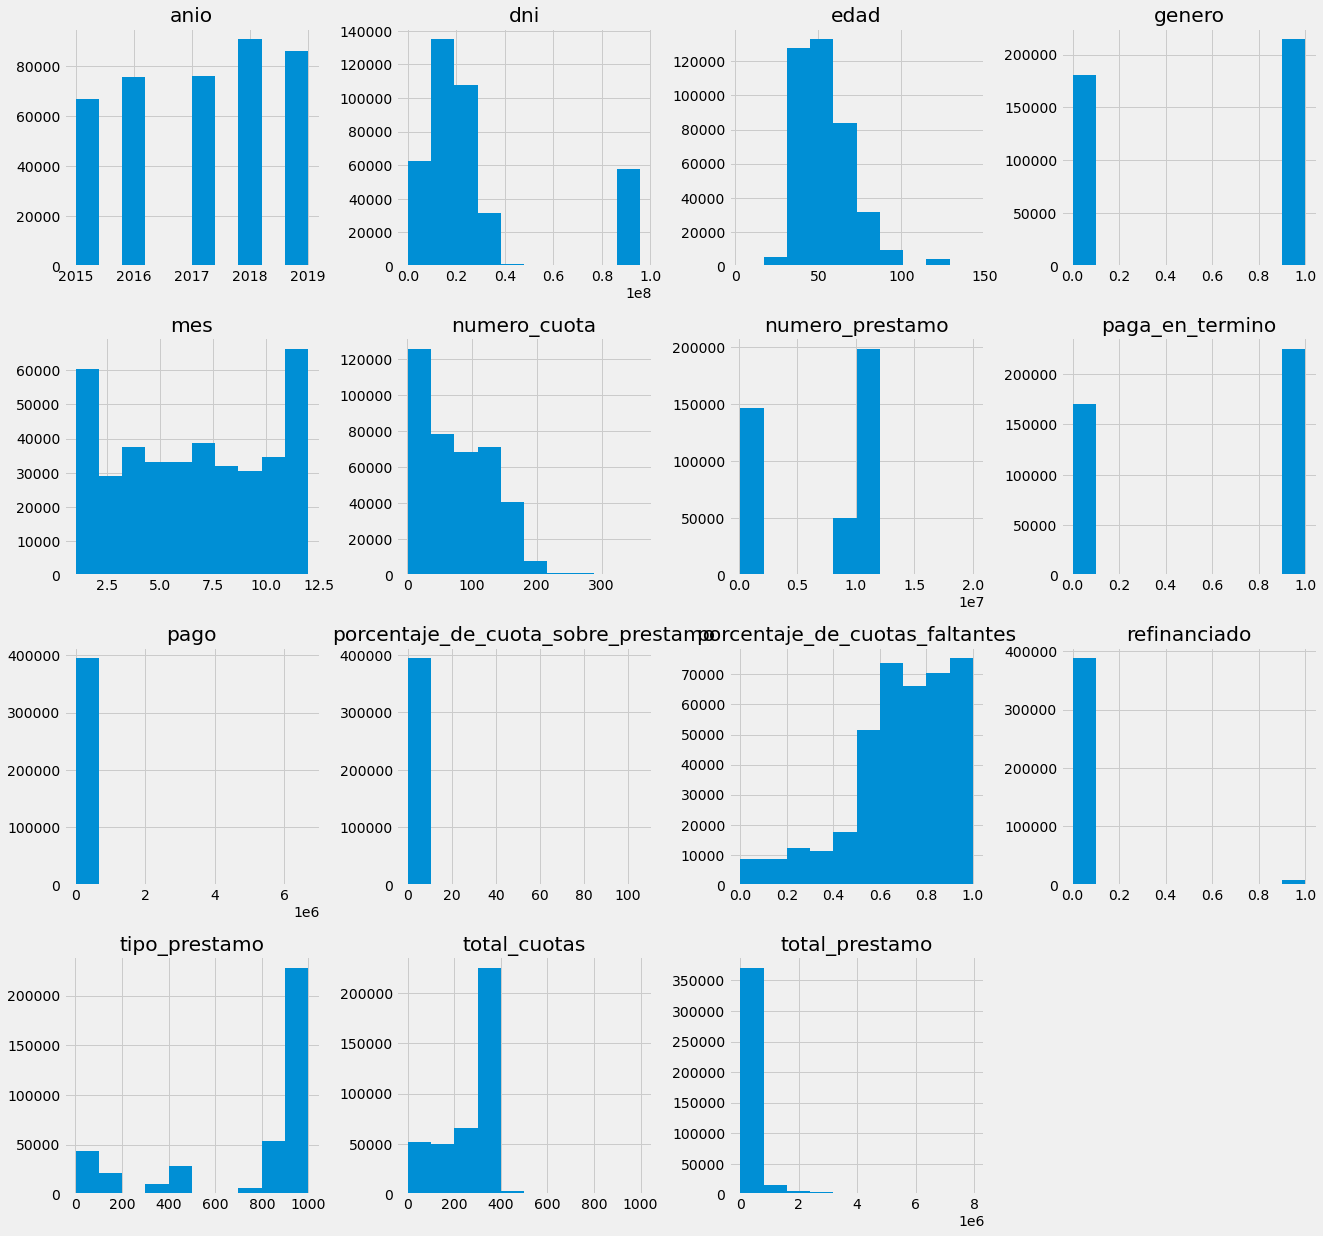

In [41]:
# Observo la distribucion de las columnas
f = plt.figure() 
df_4_parsed.hist(figsize=(20,20))
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Total cuotas

<AxesSubplot:>

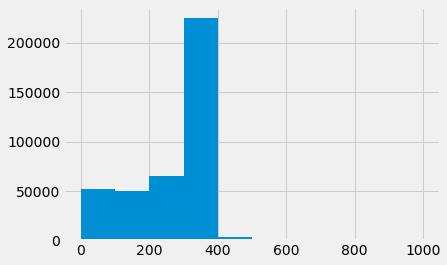

In [42]:
# Analizo la distribucion del total de cuotas
df_4_parsed['total_cuotas'].hist()

In [43]:
df_4_parsed['total_cuotas'].describe()

count   395,516.00
mean        277.12
std         115.46
min           1.00
25%         188.00
50%         360.00
75%         360.00
max         999.00
Name: total_cuotas, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d99faaee20>,
 'caps': [<matplotlib.lines.Line2D at 0x1d99faae5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d99faa0250>],
 'medians': [<matplotlib.lines.Line2D at 0x1d99fa06820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d99fa06cd0>],
 'means': []}

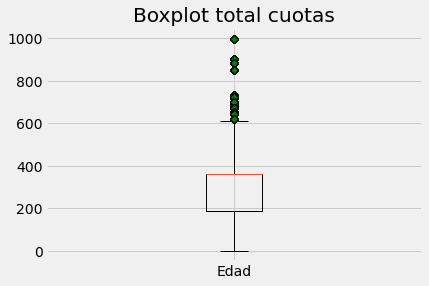

In [44]:
# Analozo los outliers
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot total cuotas')
ax.boxplot(df_4_parsed['total_cuotas'], flierprops=green_diamond, labels=["Edad"])

### Total prestamo

Text(0.5, 1.0, 'Total cuotas')

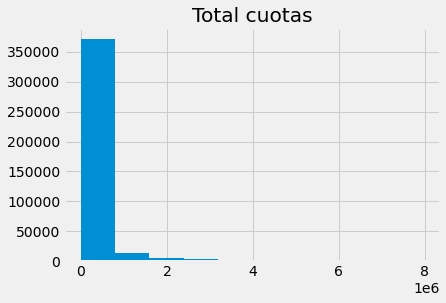

In [45]:
fig, ax = plt.subplots()
df_4_parsed['total_prestamo'].hist()
ax.set_title('Total cuotas')

In [46]:
pd.options.display.float_format = '{:.1f}'.format
df_4_parsed['total_prestamo'].describe()

count    395516.0
mean     207312.2
std      439371.3
min          94.7
25%       20001.7
50%       66940.0
75%      152827.9
max     7951994.8
Name: total_prestamo, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9a006e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d99fffecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9a006e3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d99fffef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d99fffec10>],
 'means': []}

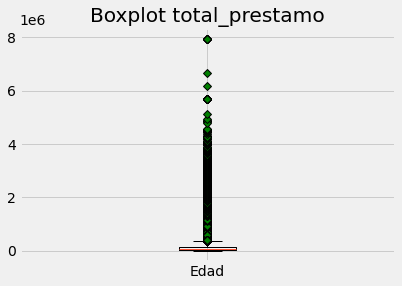

In [47]:
# Veo outliers del total de prestamos
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot total_prestamo')
ax.boxplot(df_4_parsed['total_prestamo'], flierprops=green_diamond, labels=["Edad"])

[]

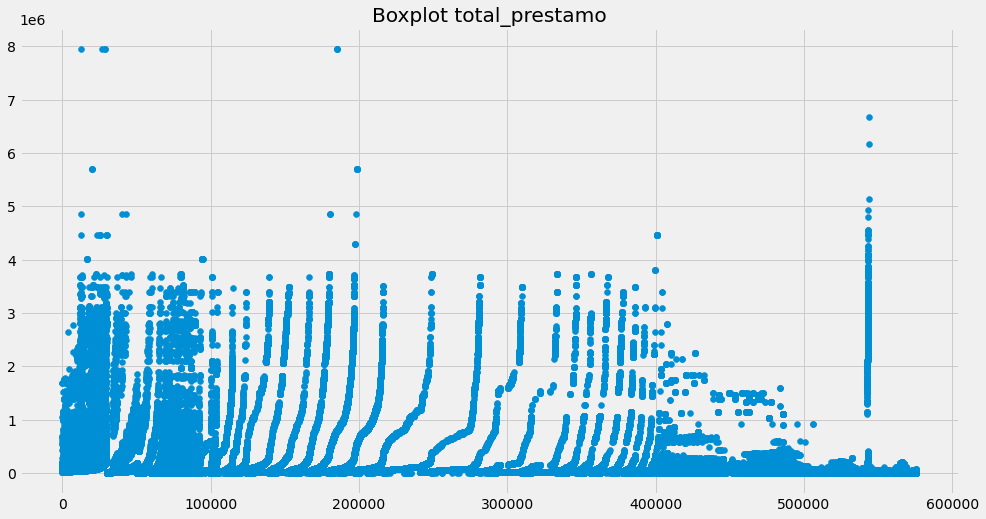

In [48]:
fig, ax = plt.subplots(figsize = (15,8))
ax.set_title('Boxplot total_prestamo')
ax.ticklabel_format(useOffset=False)
ax.scatter(y= df_4_parsed['total_prestamo'], x=df_4_parsed['total_prestamo'].index)
ax.ticklabel_format(useOffset=False)
plt.plot()

## Distribución de prestamos entre mujeres, hombres y edades 

In [51]:
df_4_parsed

,porcentaje_de_cuota_sobre_prestamo,pago,vencimiento,dni,numero_cuota,numero_prestamo,tipo_prestamo,paga_en_termino,porcentaje_de_cuotas_faltantes,fecha_pago,total_cuotas,total_prestamo,refinanciado,genero,edad,mes,anio
1,0.0,1.0,2017-01-20,5537895.0,79,10001912,802,0,0.7,2017-03-20,223,21576.1,0,1,47.0,3,2017
2,0.0,1.0,2017-01-20,20226052.0,141,1092970,954,1,0.6,2017-01-20,360,73778.3,0,1,53.0,1,2017
3,0.0,1.0,2019-01-20,17091215.0,167,1092889,954,1,0.5,2018-11-20,360,50260.6,0,1,57.0,11,2018
5,0.0,1.0,2017-02-20,8589421.0,4,11000633,157,0,1.0,2017-04-20,226,24308.9,0,1,50.0,4,2017
6,0.0,1.0,2017-02-20,20226052.0,142,1092970,954,1,0.6,2017-01-20,360,73778.3,0,1,53.0,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575911,10.0,2011.4,2018-06-21,30211349.0,6,11002324,1,1,0.4,2018-06-19,10,20135.8,0,0,34.0,6,2018
575912,10.0,2011.4,2018-09-21,27485630.0,5,11003168,1,1,0.5,2018-12-09,10,20130.5,0,0,42.0,12,2018
575913,10.0,2011.4,2018-04-23,30211349.0,4,11002324,1,1,0.6,2018-04-19,10,20135.8,0,0,34.0,4,2018
575914,10.0,2012.1,2018-01-21,30211349.0,1,11002324,1,1,0.9,2018-01-19,10,20135.8,0,0,34.0,1,2018


Text(0.5, 0, 'genero e intervalo de edad')

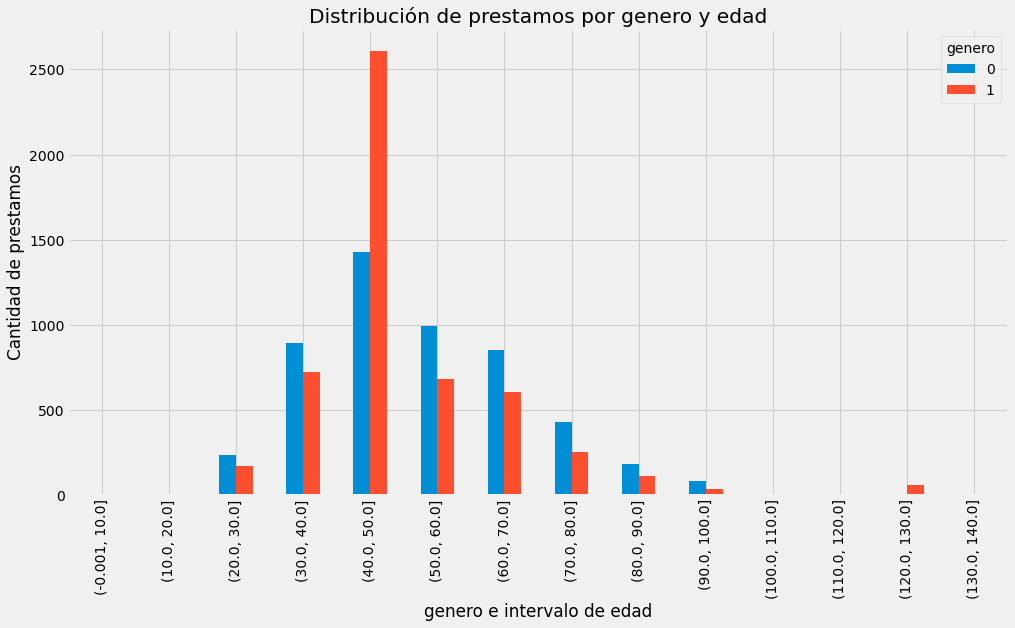

In [214]:
fig, ax = plt.subplots(figsize = (15,8))
df_prestamos = df_4_parsed[['numero_prestamo','edad', 'genero']].copy()
df_prestamos = df_prestamos.drop_duplicates()
df_prestamos['interval'] = pd.cut(df_prestamos['edad'], [x for x in range (0,150,10)], include_lowest=True )
df_prestamos = df_prestamos.groupby(['genero','interval']).size()
df_prestamos.unstack(level=0).plot.bar(ax = ax )
plt.title ('Distribución de prestamos por genero y edad')
plt.ylabel('Cantidad de prestamos')
plt.xlabel('genero e intervalo de edad')

### Tipos de prestamos con mas cuotas impagas 

Text(0.5, 0, 'Tipo de prestamos')

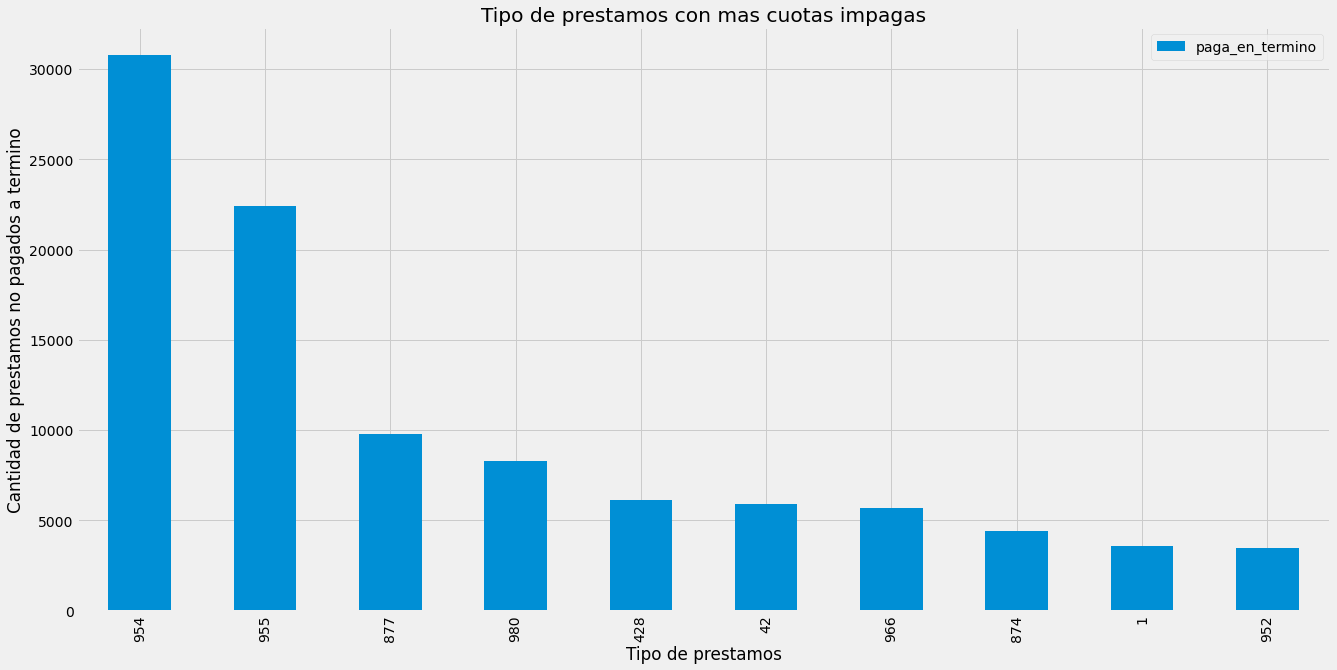

In [246]:
fig, ax = plt.subplots(figsize = (20,10))
df_prestamos = df_4_parsed[['tipo_prestamo', 'paga_en_termino']].copy()
df_prestamos.groupby('tipo_prestamo').agg(lambda x: x.eq(0).sum()).sort_values(by='paga_en_termino', ascending=False).head(10).plot.bar(ax=ax)
plt.title ('Tipo de prestamos con mas cuotas impagas')
plt.ylabel('Cantidad de prestamos no pagados a termino')
plt.xlabel('Tipo de prestamos')

### Distribucion de la cantidad de dias que se suelen pasar del pago

In [ ]:
df_4_parsed.vencimiento

Text(0.5, 0, 'Diferencia en días entre la fecha de pago y el vencimiento')

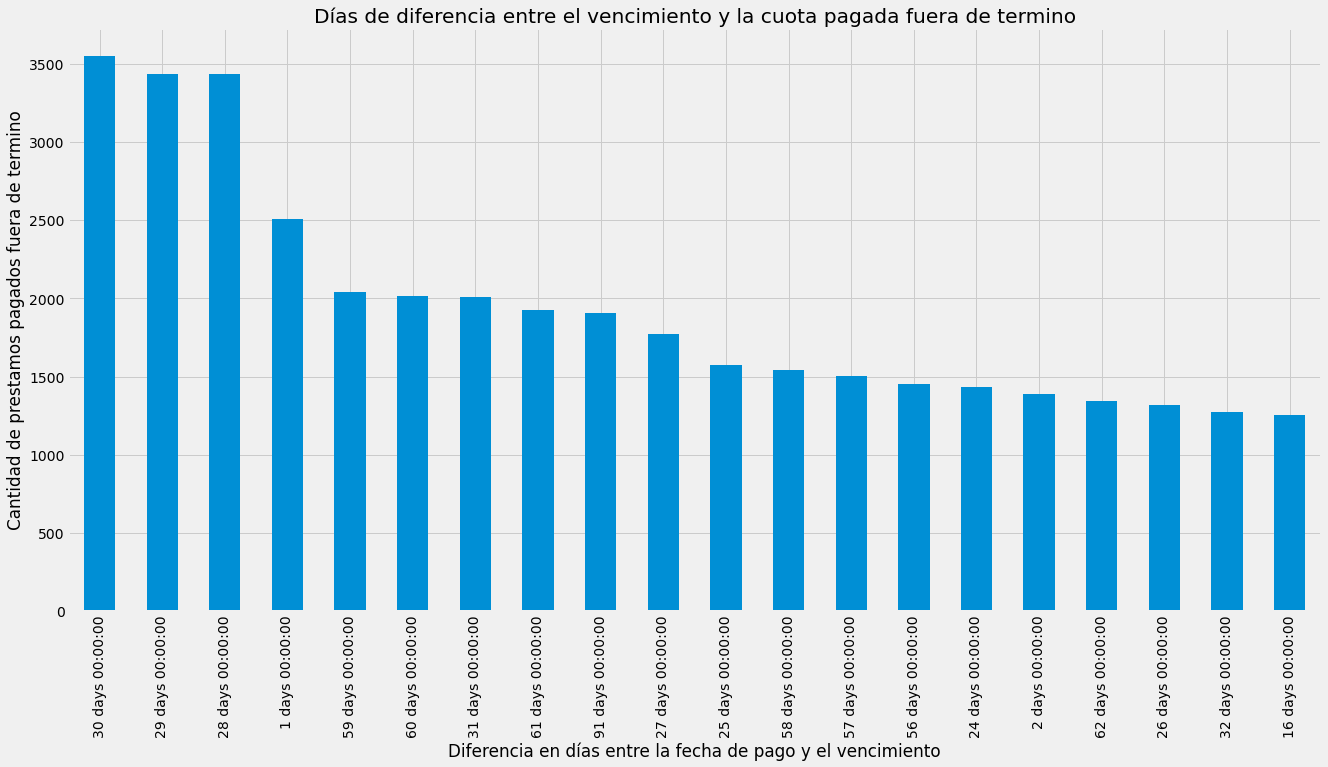

In [265]:
fig, ax = plt.subplots(figsize = (20,10))
df_prestamos = df_4_parsed[['fecha_pago', 'vencimiento']].copy()
df_prestamos['días_atraso'] =  df_4_parsed['fecha_pago'] - df_4_parsed['vencimiento']
df_prestamos = df_prestamos[df_prestamos['días_atraso']>pd.Timedelta(0)]
df_prestamos['días_atraso'].value_counts().head(20).plot.bar()
plt.title ('Días de diferencia entre el vencimiento y la cuota pagada fuera de termino')
plt.ylabel('Cantidad de prestamos pagados fuera de termino')
plt.xlabel('Diferencia en días entre la fecha de pago y el vencimiento')

### Corr 

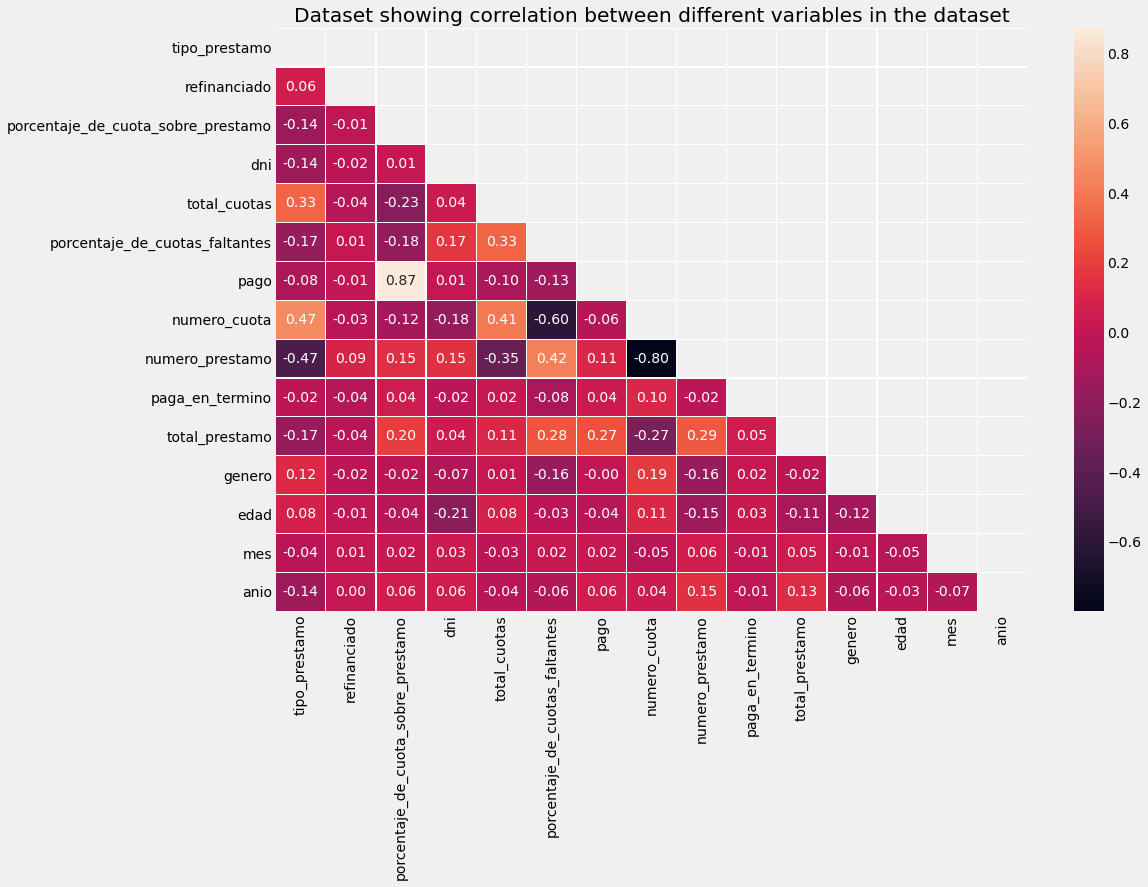

In [48]:
# Análisis de correlación de variables
corr = df_4_parsed.corr()
mask = np.triu(np.ones_like(corr))
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.2, mask=mask)
plt.title('Dataset showing correlation between different variables in the dataset')
plt.show()

In [49]:
# Observo los primeros y ultimos datos de la correlacion
price_range_corr =  corr.paga_en_termino.sort_values(ascending = False)
price_range_corr_top = price_range_corr.head(10)
price_range_corr_bottom = price_range_corr.tail(10)
print ('top corr: \n{} \n\nbottom corr: \n{}'.format(price_range_corr_top, price_range_corr_bottom))

top corr: 
paga_en_termino                       1.0
numero_cuota                          0.1
total_prestamo                        0.0
porcentaje_de_cuota_sobre_prestamo    0.0
pago                                  0.0
edad                                  0.0
genero                                0.0
total_cuotas                          0.0
mes                                  -0.0
anio                                 -0.0
Name: paga_en_termino, dtype: float64 

bottom corr: 
edad                              0.0
genero                            0.0
total_cuotas                      0.0
mes                              -0.0
anio                             -0.0
tipo_prestamo                    -0.0
dni                              -0.0
numero_prestamo                  -0.0
refinanciado                     -0.0
porcentaje_de_cuotas_faltantes   -0.1
Name: paga_en_termino, dtype: float64


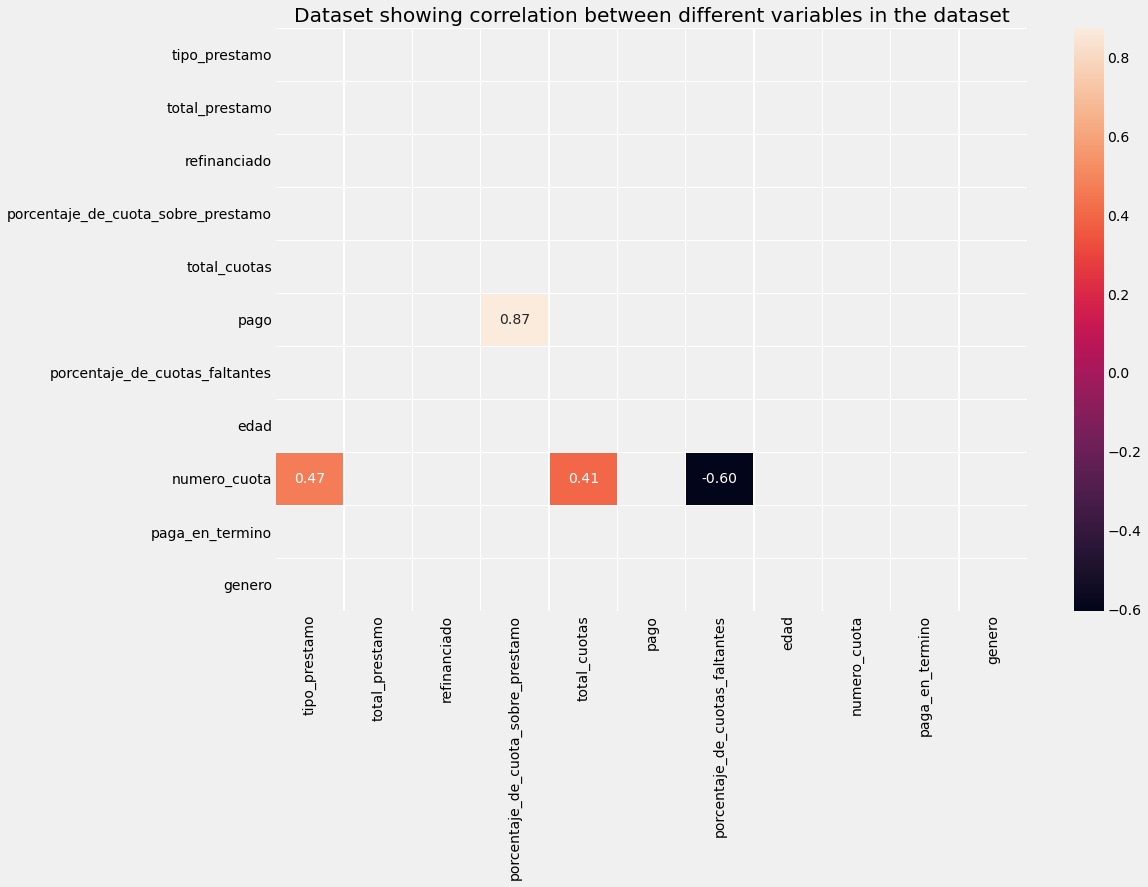

In [229]:
# Traigo las correlaciones mas altas 
columns_data_corr = list(set(columns_data)&set(corr.columns))
corr_filter = corr[(corr>0.4) | (corr<-0.4)][columns_data_corr].copy()
corr_filter = corr_filter.filter(items = columns_data_corr, axis=0)
mask = np.triu(np.ones_like(corr_filter))
corr_filter.shape

plt.figure(figsize=(15,10))
sns.heatmap(corr_filter, annot=True, fmt='.2f', linewidths=.2,mask=mask)
plt.title('Dataset showing correlation between different variables in the dataset')
plt.show()

### Limpio los outliers principales  sobre el total de prestamo

In [51]:
Q1 = df_4_parsed['total_prestamo'].quantile(0.25)
Q3 = df_4_parsed['total_prestamo'].quantile(0.75)
IQR = Q3 - Q1
IQR

132826.25

In [52]:
z = np.abs(stats.zscore(df_4_parsed['total_prestamo']))
z

array([0.09454596, 0.11258135, 0.00815867, ..., 0.0377727 , 0.34953873,
       0.34953873])

In [53]:
# Se toman los prestamos con outliers
index_no_outlier = df_4_parsed['total_prestamo'][(z < 3)].index

In [54]:
# Se filtran los prestamos sin outliers
prestamos_sin_outlier = df.filter(items = index_no_outlier, axis=0)['numero_prestamo'].unique()

In [55]:
# Se crea un nuevo dataset sin outliers de numero de prestamo
df_5_sin_outlier = df_4_parsed[df_4_parsed['numero_prestamo'].isin(prestamos_sin_outlier)].copy()

## FILTRADO DE COLUMNA PARA EL MODELADO 

In [56]:
# Selecciono los estimadores
columns_model_no_time = list(set(columns_data) - {'fecha_pago', 'pago', 'vencimiento'})

In [57]:
columns_model_no_time

['tipo_prestamo',
 'total_prestamo',
 'refinanciado',
 'porcentaje_de_cuota_sobre_prestamo',
 'total_cuotas',
 'porcentaje_de_cuotas_faltantes',
 'edad',
 'numero_cuota',
 'paga_en_termino',
 'genero']

# 5. MODELADO 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [79]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Aplico varios modelos bases para ver cual se ajusta mejor 

In [80]:
# Selecciono las features, saco paga_a_termino por ser target, y las columnas de fechas que no las proceso en este modelo
features = list(set(columns_data)-  {'paga_en_termino','fecha_pago', 'vencimiento'})
features

['tipo_prestamo',
 'total_prestamo',
 'refinanciado',
 'porcentaje_de_cuota_sobre_prestamo',
 'total_cuotas',
 'pago',
 'porcentaje_de_cuotas_faltantes',
 'edad',
 'numero_cuota',
 'genero']

In [61]:
X = df_5_sin_outlier[features]
y = df_5_sin_outlier['paga_en_termino']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [64]:
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
#  ('SVM', SVC()), 

In [65]:
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['pago a termino', 'no pago a termino']
dfs= []

In [66]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)

LogReg
                   precision    recall  f1-score   support

   pago a termino       0.57      0.27      0.37     49118
no pago a termino       0.61      0.85      0.71     65449

         accuracy                           0.60    114567
        macro avg       0.59      0.56      0.54    114567
     weighted avg       0.59      0.60      0.56    114567

RF
                   precision    recall  f1-score   support

   pago a termino       0.92      0.86      0.89     49118
no pago a termino       0.90      0.95      0.92     65449

         accuracy                           0.91    114567
        macro avg       0.91      0.90      0.91    114567
     weighted avg       0.91      0.91      0.91    114567

KNN
                   precision    recall  f1-score   support

   pago a termino       0.88      0.80      0.84     49118
no pago a termino       0.86      0.92      0.89     65449

         accuracy                           0.87    114567
        macro avg       0.87      

In [83]:
final.groupby('model').mean().sort_values(by=['test_f1_weighted'], ascending=False)

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
model,,,,,,,
RF,41.4,3.8,0.9,0.9,0.9,0.9,1.0
KNN,1.4,3.9,0.9,0.9,0.9,0.9,0.9
XGB,6.2,0.3,0.8,0.8,0.8,0.8,0.9
LogReg,1.6,0.1,0.6,0.6,0.6,0.5,0.6
GNB,0.1,0.1,0.5,0.5,0.5,0.3,0.6


## Cross validation 

### Random Forest 

In [76]:
grid = { 
    'n_estimators': [100,200,300,400,500]
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy'],
#     'random_state' : [18]
}

In [77]:
# Instancio el modelo
# clf=RandomForestClassifier(n_estimators=100) //Modelo original

In [78]:
res = []
best_params = []
anios = [2015, 2016] #np.sort(df_5_sin_outlier['anio'].unique())
meses = list(range (1,13))

# Cross validation
for anio in anios:
    for mes in meses:
        df_5_train = df_5_sin_outlier.loc[(df_4_parsed['anio']<=anio) & (df_4_parsed['mes']<=mes), :]
        if mes ==12:
            anio+=1
            mes =0
        df_5_test = df_5_sin_outlier.loc[(df_4_parsed['anio']==anio) & (df_4_parsed['mes']==mes+1),: ]
        
        X_train = df_5_train[features]
        y_train = df_5_train['paga_en_termino']
        
        X_test = df_5_test[features]
        y_test = df_5_test['paga_en_termino']    
        
#       Grid Search
        rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
        rf_cv.fit(X_train, y_train)
        best_params.append(rf_cv.best_params_)
        
#       Model
        clf=RandomForestClassifier(**rf_cv.best_params_)
     
      
        clf.fit(X_train,y_train)
        
        y_pred=clf.predict(X_test)
            
        res.append(metrics.accuracy_score(y_test, y_pred))
        
        print(metrics.accuracy_score(y_test, y_pred))
        print(rf_cv.best_params_)
        print()

0.7525982256020279
{'n_estimators': 400}

0.7708280577361357
{'n_estimators': 300}

0.7985679070313417
{'n_estimators': 500}

0.8235516135119834
{'n_estimators': 100}

0.8243451463790447
{'n_estimators': 200}

0.8262139466958744
{'n_estimators': 400}

0.8342629482071713
{'n_estimators': 300}

0.8306294613887086
{'n_estimators': 500}

0.8596770766942851
{'n_estimators': 200}

0.8675641258868474
{'n_estimators': 400}

0.8425350612462276
{'n_estimators': 200}

0.823611666000799
{'n_estimators': 100}

0.7746795592534292
{'n_estimators': 200}

0.8044157002676182
{'n_estimators': 500}

0.8396699743561155
{'n_estimators': 200}

0.8085000826856292
{'n_estimators': 500}

0.8315160042208934
{'n_estimators': 100}

0.8131821403260099
{'n_estimators': 400}

0.7935008804226028
{'n_estimators': 100}

0.8321872953503602
{'n_estimators': 400}

0.8245762711864407
{'n_estimators': 100}

0.8512357414448669
{'n_estimators': 500}

0.831763698630137
{'n_estimators': 400}

0.8183345780433159
{'n_estimators': 

### KNeighborsRegressor (VER)

In [85]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=4)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = metrics.mean_absolute_error(y_test, knn_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)


score KNN:  0.6984690067214339
promedio de error absoluto KNN 0.3015309932785661


In [104]:
k_max = 30
error_rate = []
for i in range(1,k_max):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

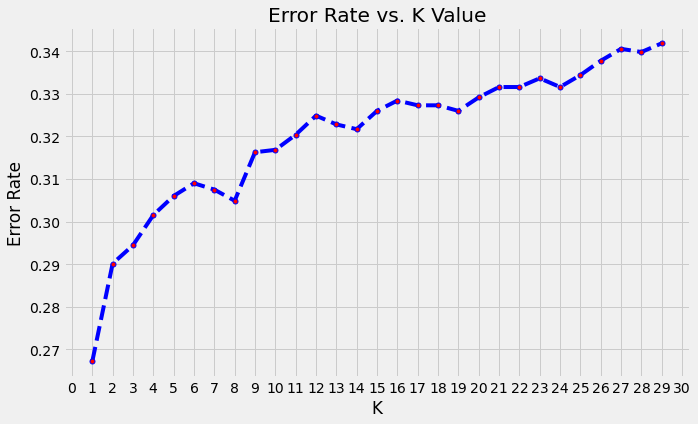

In [105]:
plt.figure(figsize=(10,6))
plt.xticks([x for x in range(k_max+1)])
plt.plot(range(1,k_max),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Decision Tree Classifier (VER)

In [115]:
from sklearn import tree

In [116]:
# Se instancia el modelo
dtc = tree.DecisionTreeClassifier(max_leaf_nodes=200,random_state = 1)
# Se fitea el modelo
dtc.fit(X_train, y_train)
# Se predice el modelo
dtc_range = dtc.predict(X_test)
# Se evalua el modelo
dtc_score = dtc.score(X_test, y_test)
dtc_mae = metrics.mean_absolute_error(y_test, dtc_range)
print('score DT: ', dtc_score)
print('promedio de error absoluto DT', dtc_mae)
importancia_features = pd.DataFrame(dtc.feature_importances_, index = X.columns, columns=['importancia'])
importancia_features_sort = importancia_features.sort_values('importancia', ascending=False)
importancia_features_sort[0:5]


score DT:  0.70537714712472
promedio de error absoluto DT 0.29462285287528006


,importancia
porcentaje_de_cuota_sobre_prestamo,0.4
pago,0.2
total_cuotas,0.1
numero_cuota,0.1
total_prestamo,0.1


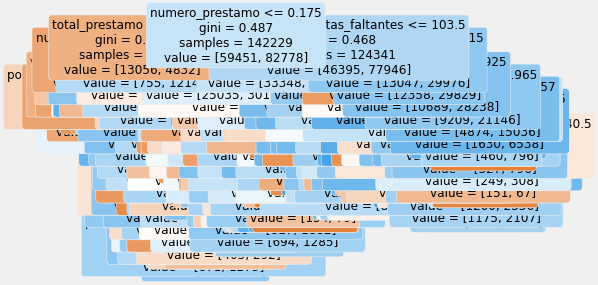

In [119]:
tree.plot_tree(dtc,feature_names=df.columns[:-1],filled=True,rounded=True, fontsize=12)
plt.show()

### Decision Tree Regression (VER)

In [126]:
from sklearn.tree import DecisionTreeRegressor
# Se instancia el modelo
dtc = DecisionTreeRegressor(max_leaf_nodes=200, random_state = 1)
# Se fitea el modelo
dtc.fit(X_train, y_train)
# Prediccion
dtc_range = dtc.predict(X_test)
# Evaluación del modelo
dtc_score = dtc.score(X_test, y_test)
dtc_Mae = metrics.mean_absolute_error(y_test, dtc_range)
print('score DT: ', dtc_score)
print('promedio de error absoluto DT', dtc_Mae)

score DT:  0.2016493357916962
promedio de error absoluto DT 0.3580574288777148


In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [128]:
model_1 = GaussianNB()
fit_1 = model_1.fit(X_train_scl, y_train)

In [130]:
predict_1_cat = fit_1.predict(X_test_scl)
accuracy_1 = metrics.accuracy_score(y_test, predict_1_cat)
print(accuracy_1)
conf_mat_1 = confusion_matrix(y_test, predict_1_cat)
print(conf_mat_1)

0.5642270351008215
[[1153 1121]
 [1213 1869]]


In [131]:
model_2 = KNeighborsClassifier()
fit_2 = model_2.fit(X_train_scl, y_train)

In [133]:
predict_2_cat = fit_2.predict(X_test_scl)
accuracy_2 = metrics.accuracy_score(y_test, predict_2_cat)
print(accuracy_2)
conf_mat_2 = confusion_matrix(y_test, predict_2_cat)
print(conf_mat_2)

0.6837191934279313
[[1153 1121]
 [ 573 2509]]


In [100]:
model_3 = tree.DecisionTreeClassifier(criterion='gini')
fit_3 = model_3.fit(X_train_scl, y_train)

In [101]:
predict_3_cat = fit_3.predict(X_test_scl)
accuracy_3 = accuracy_score(y_test, predict_3_cat)
print(accuracy_3)
conf_mat_3 = confusion_matrix(y_test, predict_3_cat)
print(conf_mat_3)

0.8586443661971831
[[40053  8431]
 [ 7627 57489]]


## FEATURE IMPORTANCE

In [226]:
clf.feature_importances_

array([0.        , 0.01333333, 0.06405596, 0.92261071])

In [227]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [137]:
import time
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

In [228]:


forest_importances = pd.Series(clf.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


ValueError: Length of passed values is 4, index implies 10.

In [151]:

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

     #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES') 


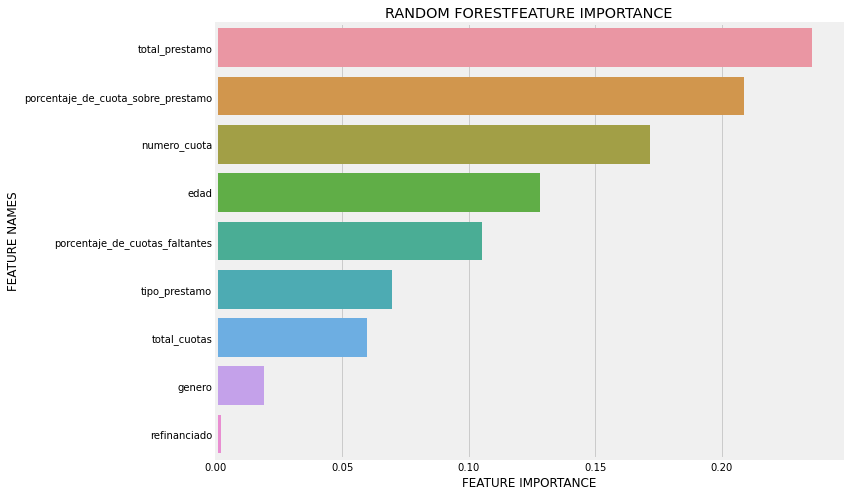

In [153]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST') 

## Grid search

## Ensambling

## Pipline

### Pickle